<a href="https://colab.research.google.com/github/xaviermurilo/xaviermurilo/blob/main/smoothed%20out%20time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

In [17]:
df = pd.read_csv('QueryResults.csv')
df.columns.m = 'Data'
df.rename(columns = {'m':'DATE', 'TagName':'TAG','Unnamed: 2' : 'POSTS'}, inplace = True)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [20]:
df.tail(5)

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [21]:
df.shape

(1991, 3)

In [22]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [25]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [26]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [44]:
df['DATE']

0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object

In [46]:
type(df['DATE'][1])

str

In [48]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [59]:
reshape = df.pivot(index= 'DATE', columns= 'TAG', values= 'POSTS')
reshape.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [61]:
reshape.fillna(0, inplace=True)

In [63]:
reshape.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [62]:
reshape.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [69]:
reshape.isna().any()

TAG
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualisaton with with Matplotlib


In [70]:
import matplotlib.pyplot as plt

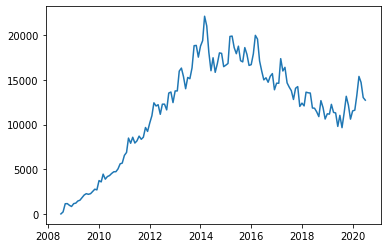

In [77]:
plt.plot(reshape.index, reshape.java)

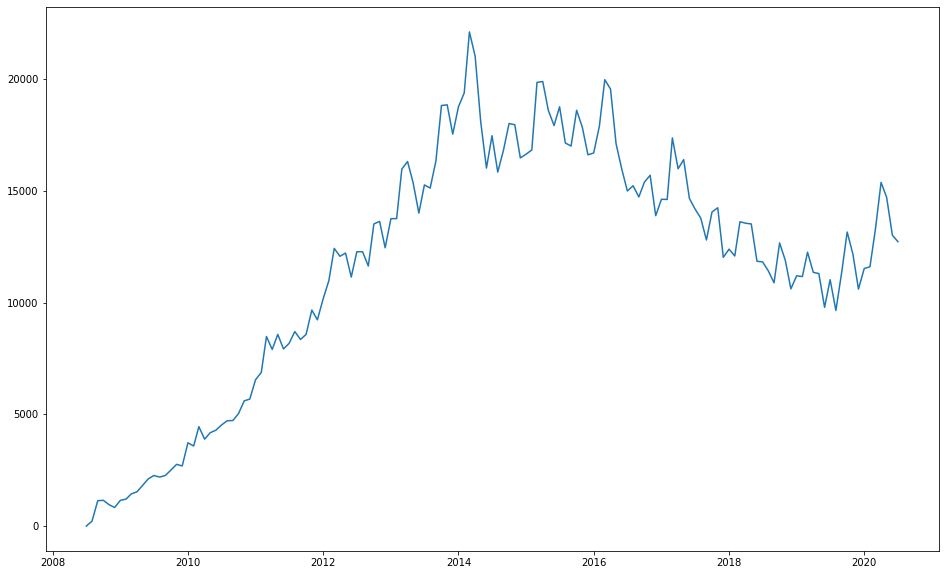

In [79]:
plt.figure(figsize=(16,10))
plt.plot(reshape.index, reshape.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

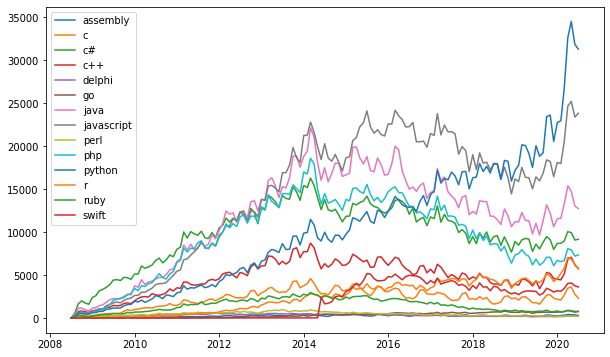

In [95]:
plt.figure(figsize=(10,6))
for coluna in reshape.columns:
  plt.plot(reshape.index, reshape[coluna], label=reshape[coluna].name)
plt.legend(fontsize=10)

In [107]:
roll_df = reshape.rolling(window=12).mean()

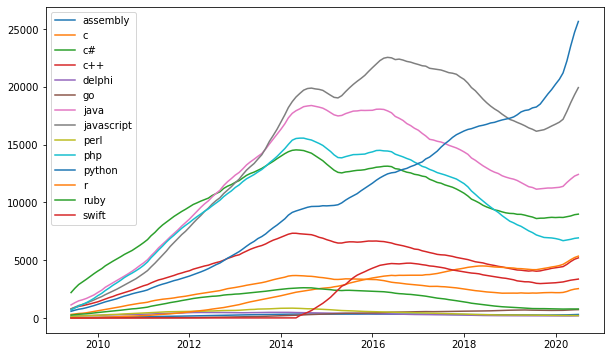

In [108]:
plt.figure(figsize=(10,6))
for coluna in roll_df.columns:
  plt.plot(roll_df.index, roll_df[coluna], label=roll_df[coluna].name)
plt.legend(fontsize=10)